#️⃣ CELL 1: 📘 Title + Overview (Markdown)
"""
# 🤖 Industrial Waste Compliance - Stacking Classifier Training

This notebook performs:
1. Data Loading & Preparation  
2. Feature Scaling & PCA  
3. Model Training (Stacking Classifier)  
4. Evaluation with Visualizations  
5. Scatter Plots for PCA and Prediction Insights 🎨

Let's dive in! 🚀
"""


In [23]:
#️⃣ CELL 2: 🧩 Import Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Aesthetic setup
sns.set(style="whitegrid", palette="cool")
plt.rcParams["figure.figsize"] = (8, 5)


In [24]:
#️⃣ CELL 3: 📂 Load Dataset

os.makedirs("./models", exist_ok=True)

df = pd.read_csv("../data/cleaned_compliance_data.csv")
target_col = "Perfect_Waste_Decomposition_System"

X = df.drop(columns=[target_col])
y = df[target_col]

# Save feature columns for reuse
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, '../models/feature_columns.pkl')

print(f"✅ Dataset Loaded: {df.shape[0]} rows × {df.shape[1]} columns")
display(df.head())


✅ Dataset Loaded: 2000 rows × 16 columns


,Waste_Segregation_Level_%,Decomposition_Efficiency_%,Recycling_Rate_%,Hazardous_Waste_Treatment_Compliance,Govt_Compliance_Status,ISO_14001_Certified,Zero_Waste_Landfill_Certified,Waste_to_Energy_Usage,CO2_Emissions_tons_per_year,Methane_Emissions_tons_per_year,Environmental_Fines_Count,Employee_Training_in_Waste_Management,Digital_Waste_Tracking,Frequency_of_Waste_Audit_per_year,Eco_Friendly_Raw_Materials_%,Perfect_Waste_Decomposition_System
0,45,46.42,58.61,1,1,0,0,1,193.97,79.97,5,1,0,2,15,0
1,76,59.90,80.63,1,0,1,0,1,565.36,251.06,12,1,0,7,72,1
2,62,81.43,49.77,1,0,1,0,1,423.11,169.30,0,1,1,7,60,1
3,74,42.78,76.70,1,1,1,1,1,182.77,95.93,0,0,0,7,56,1
4,84,70.61,71.64,1,0,1,1,1,67.37,2.87,0,0,1,7,53,1


In [25]:
#️⃣ CELL 4: ✂️ Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("🔹 Training set shape:", X_train.shape)
print("🔸 Testing set shape:", X_test.shape)


🔹 Training set shape: (1600, 15)
🔸 Testing set shape: (400, 15)


In [26]:
#️⃣ CELL 5: ⚖️ Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, "../models/scaler.pkl")
print("✅ Scaler saved successfully!")


✅ Scaler saved successfully!


In [27]:
#️⃣ CELL 6: 🧠 PCA (Keep 95% Variance)

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
joblib.dump(pca, "../models/pca.pkl")

print(f"✅ PCA Applied: Reduced from {X_train.shape[1]} → {X_train_pca.shape[1]} components")


✅ PCA Applied: Reduced from 15 → 14 components


c:\Users\shank\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


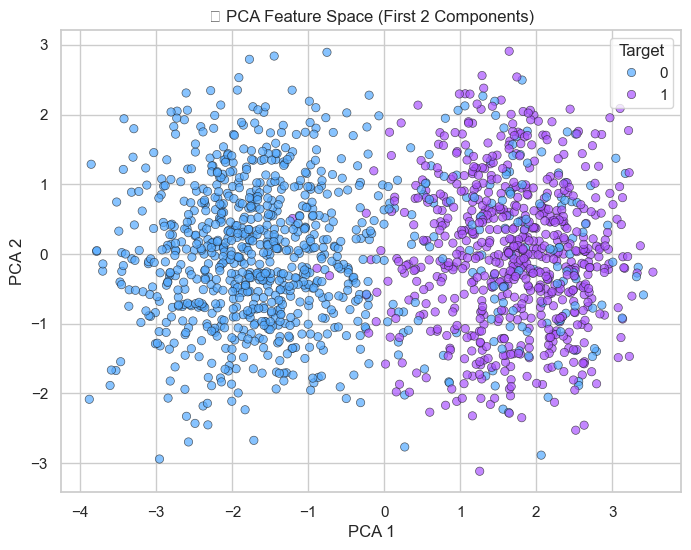

In [28]:
#️⃣ CELL 7: 🎨 PCA Scatter Visualization (2 Components)

if X_train_pca.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x=X_train_pca[:, 0], 
        y=X_train_pca[:, 1],
        hue=y_train,
        palette="cool",
        alpha=0.7,
        edgecolor="k"
    )
    plt.title("🔹 PCA Feature Space (First 2 Components)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(title="Target")
    plt.show()
else:
    print("⚠️ Not enough PCA components for scatter visualization.")


In [29]:
#️⃣ CELL 8: ⚙️ Define Models for Stacking

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('nb', GaussianNB())
]

meta_model = LogisticRegression(max_iter=1000, random_state=42)

stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

print("✅ Base and Meta Models Defined Successfully!")


✅ Base and Meta Models Defined Successfully!


In [30]:
#️⃣ CELL 9: 🧩 Train the Stacking Model

stack_model.fit(X_train_scaled, y_train)
print("🏋️‍♂️ Training Completed!")

# Save trained model
joblib.dump(stack_model, "../models/stack_model.pkl")
print("✅ Model saved at: ../models/stack_model.pkl")


🏋️‍♂️ Training Completed!
✅ Model saved at: ../models/stack_model.pkl


🏆 **Stacking Model Performance (Scaled Data)**
Accuracy: 0.895

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       251
           1       0.80      0.96      0.87       149

    accuracy                           0.90       400
   macro avg       0.89      0.91      0.89       400
weighted avg       0.91      0.90      0.90       400



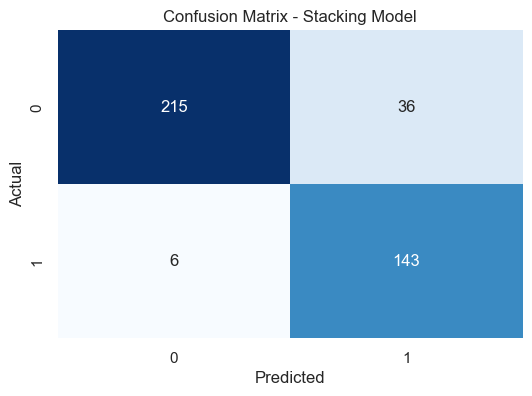

In [31]:
#️⃣ CELL 10: 📊 Evaluate Model Performance

y_pred = stack_model.predict(X_test_scaled)

print("🏆 **Stacking Model Performance (Scaled Data)**")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Stacking Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


c:\Users\shank\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


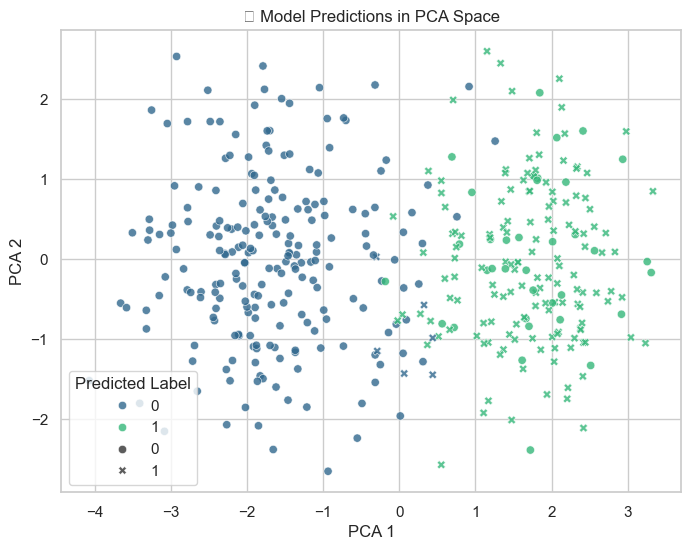

In [32]:
#️⃣ CELL 11: 🌈 Scatter Plot - Prediction Results (True vs Predicted)

# Use PCA for 2D visualization
if X_test_pca.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x=X_test_pca[:,0], 
        y=X_test_pca[:,1],
        hue=y_pred,
        style=y_test,
        palette="viridis",
        alpha=0.8
    )
    plt.title("🧩 Model Predictions in PCA Space")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(title="Predicted Label")
    plt.show()


In [33]:
#️⃣ CELL 12: 🔥 Base Models Comparison

results = []
for name, model in base_models:
    model.fit(X_train_scaled, y_train)
    y_pred_base = model.predict(X_test_scaled)
    results.append({
        "Model": name.upper(),
        "Accuracy": accuracy_score(y_test, y_pred_base),
        "Precision": precision_score(y_test, y_pred_base, zero_division=0),
        "Recall": recall_score(y_test, y_pred_base, zero_division=0),
        "F1-Score": f1_score(y_test, y_pred_base, zero_division=0)
    })

results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
display(results_df)


,Model,Accuracy,Precision,Recall,F1-Score
0,RF,0.8950,0.792350,0.973154,0.873494
3,NB,0.8775,0.780899,0.932886,0.850153
2,KNN,0.8650,0.771429,0.906040,0.833333
1,DT,0.8600,0.803922,0.825503,0.814570


c:\Users\shank\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


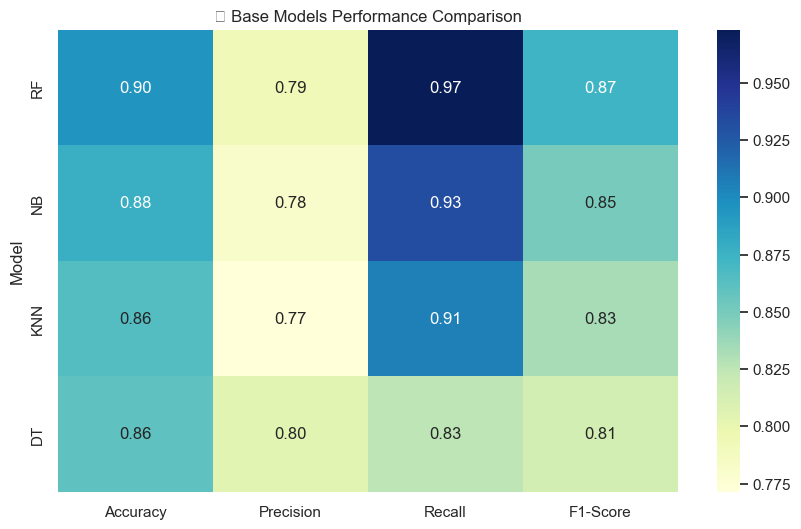

C:\Users\shank\AppData\Local\Temp\ipykernel_8560\1144587379.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="cool")


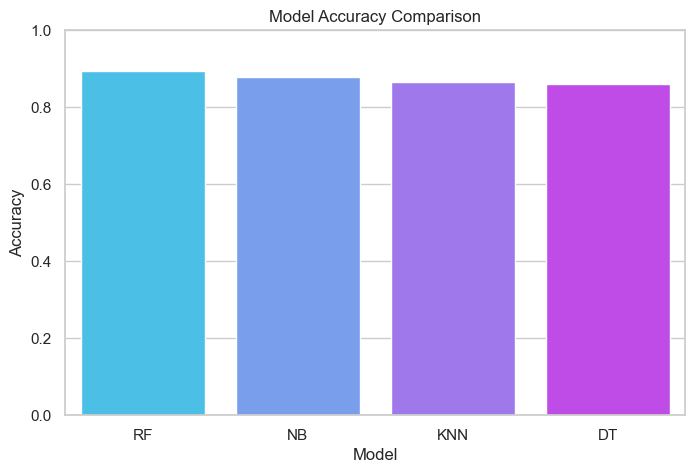

In [34]:
#️⃣ CELL 13: 📈 Visualization - Base Models Performance

plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index("Model"), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("📊 Base Models Performance Comparison")
plt.ylabel("Model")
plt.show()

# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="cool")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()


#️⃣ CELL 14: ✅ Final Summary (Markdown)
"""
# ✅ Summary

- Dataset cleaned and standardized with **StandardScaler**  
- **PCA** reduced dimensionality to capture 95% variance  
- Built an ensemble **Stacking Classifier** with:
  - Random Forest 🌲
  - Decision Tree 🌳
  - KNN 👥
  - Naive Bayes 📈  
  - Logistic Regression ⚙️ (meta model)
- Visualized:
  - PCA space before training  
  - Prediction scatter in PCA 2D  
  - Confusion matrix  
  - Base model heatmap and accuracy chart  

🎯 Final trained model saved: `../models/stack_model.pkl`
"""
